### Gaussian Mixture Models (GMMs)

Gaussian mixture is a routine provided by `scikit-learn` under the `sklearn.mixture` framework. It consists of the following sub-routines:
- Initialization. The user calls the constructor to the `GaussianMixture` method, specifying the number of gaussians he wants the model to have.
- Expectation-Maximization (EM) algorithm, which is divided in
    - Expectation: the routine computes the posterior probability of each data point belonging to each gaussian component, this is the so called *responsibility*. If the model posterior probability will be simply the sum of the gaussian pdfs, each with their own mean $\mu_j$ and bandwidth $\sigma_j$
    
        $$
            p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j)
        $$
    
        where $\alpha_j$ is the weight of each gaussian. Then the responsibilities will just be
        
        $$
            p(x_i|\theta_j) = \alpha_j \mathcal{N}(\mu_j,\sigma_j)
        $$
        
        finally, the likelihood of each point being generated by one of the gaussians $j$ will be
        Bayes rule
        
        $$
            p(j|x_i) = \frac{a_j \mathcal{N(\mu_j,\sigma_j)}}{\sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j)}
        $$
        <br>
     -  Maximization: in this step the routine updates the parameters of the gaussian components to maximize the loglikelihood of the data, here you compute the $\theta = \{ \mu_j, \sigma_j, \alpha_j\, \forall j \}$ 
     <br>
     
     - Convergence: you iteratively repeat EM until convergence to the maximum value
     <br>
     
     - Prediction and model usage: here you can access the results and make predictions, this is where you can access the maximized loglikelihood which is given by the `.score_samples` method, and it returns
     
     $$
         \ln{p(x_i|\theta_0)} = \sum_i \sum_j \ln p(j|x_i)
     $$

#### p-values in hypothesis testing
Say we want to test wether an observation agrees with a certain hypothesis. Your ground hypothesis could be for example that the data is being generated from a gaussian distribution, this is called *null hypothesis*. Now how do you validate this assumption?

You can compute the $p$-value, this is computed as follows 

$$ p_i = \int_{x_i}^\infty h_0(x)dx $$

so for a data point $x_i$ its $p$-value is the probability that another point from your *null hypothesis* distribution can be drawn at a higher value than $x_i$.
The bigger your initial guess is the smaller the area under the curve is and the more likely the $p$-value is small, that is if your hypothesis is the correct one.

We set a certain threshold to what would be an acceptable $p$-value enough to actually validate your hypothesis, this is called *significance*, and is normally $\alpha \sim 0.05$.

Finally this results in having $p_i < \alpha$, if all the p-values are below alpha then your hypothesis is good.


#### KS test
If you have two models for your data and you want to compare them and decide which is best it's common use to calculate the *distance between cdfs* of your two models.

The KS test is based on $D$, which measures the maximum difference in the cfs of our two sample, and then asks this simple question:

> How often would the value of D occour if the $x_i$ were drawn from the same distribution? (*our null hypothesis*) 

And now you have your test, if the probability of this happening is low then you reject your null hypothesis.



### KDE
Kernel Density Estimation is a non-parametric model that is best used in representing datas as a continous distribution that corrects some observation bias you can have due to poor bin discretization choice.

The idea is simple, you place a kernel (typically a Gaussian) on each data point (centering its mean value), KDE then sums up these kernels to form the estimated density function. The kernel then evaluates $f(x_i)$ and finally normalizes these values. 

Keep in mind that the KDE constructor expects a `bandwidth` parameter which determines the width of the kernels placed on each data point and affects the smoothness and flexibility of the estimated density function.

The bandwidth parameter controls the trade-off between bias and variance in the estimation. A smaller bandwidth leads to a more flexible KDE that can capture fine details and fluctuations in the data but may also introduce more noise or overfitting. On the other hand, a larger bandwidth results in a smoother KDE but may oversmooth the data, potentially masking important features or details.

To select the right bandwidth normally one can use some model validation techniques such as cross validation or AIC/BIC.

---

### Markov Chain
A markov chain is a model that describes a sequence of events where the probability of transitioning to the next depends only on the current state, which makes it memoryless.

Mathematically, we have

$$p(\theta_{i+1}|\theta_i, \theta_{i-1}, \theta_{i-2}, \cdots) = p(\theta_{i+1}|\theta_i).$$

It is necessary that the transition probability is symmetric:

$$    p(\theta_{i+1}|\,\theta_i) = p(\theta_i |\, \theta_{i+1}). $$

Given a Markov chain of length $N$ that corresponds to draws of $p(\theta)$, integrals can be estimated as

$$ \int g(\theta) \, p(\theta) \, d\theta \approx {1 \over N} \sum_{i=1}^Ng(\theta_i).$$

where $\theta$ here is a collection of parameters and $\theta_i$ are the single vectors iterations of the markov chain.

If you want your MC to reach your final posterior the probability of arriving at point $\theta_{i+1}$ must be

$$ p(\theta_{i+1}) = \int T(\theta_{i+1}| \theta_i) p(\theta_i) d\theta_i $$

$ T(\theta_{i+1}| \theta_i) $ is the proposal distribution of your, as you can see the probability depends only on the precedent point, and then you need to satisfy the principle of detailed balance so 

$$ T(\theta_{i+1}|\theta_i)  \,  p(\theta_i) = T(\theta_i|\theta_{i+1})  \,  p(\theta_{i+1}). $$

which means that the proposal must be symmetric, for example a gaussian. The physics is contained in $p(\theta_i)$

#### Acceptance algorithms: Metropolis Hastings
If you've done everything correctly you now should be able to compute the $p(\theta_{i+1})$, now how do you decide if it's worth it to jump to the next parameter?
In metropolis hastings you define an *acceptance probability*:

$$ p_\mathrm{acc}(\theta_i, \theta_{i+1}) = \dfrac{p(\theta_{i+1})}{p(\theta_i)} $$

and then you sample random draws between a $[0,1]$ uniform distribution, this way you are not always moving towards the best possible $\theta$ but you're also allowing to map the sourroundings of your final posterior.

Finally we can use the chain for inference, for instance an histogram of $\theta$ is an estimator of the posterior pdf for $\theta$ and its expectation value will just be 

$$ I = \int g(\theta) \, p(\theta) \, d\theta = \frac{1}{N} \sum_{i=1}^N g(\theta_i) $$

So for instance the mean will just be 

$$ \bar{\theta} = \frac{1}{N} \sum_{i=1}^N g(\theta_i) $$

#### Adaptive Metropolis Hastings
Is a bit more sophisticated, it adopts the parameter covariance matrix to tune the widths of the proposal distribution (provided they are gaussian)

---

### Kmeans clustering
K means seeks to minimize the following value

$$\sum_{k=1}^{K}\sum_{i\in C_k}||x_i - \mu_k||^2$$

where $\mu_k = \frac{1}{N_k}\sum_{i\in C_k} x_i$

This object is the *intra-cluster variance*, which is the sum of the squared eucledian distances between each data point and its respective assigned cluster centroid.

User sets in the constructor the number of clusters he wants his model to have, this is the parameter $K$.

The model will then
- initialize K cluster centroids, randomly
- assign the data points to the cluster represented by the nearest centroid
- calculate the new centroids by taking the mean of all the data points of that cluster
- repeat until you minimize the intra-cluster variance (variance within the cluster, bascially the width)

To select the best $K$ one can refer to some techniques such as the elbow method or the Davies-Bouldin score plot.
You could also use `GridsearchCV` to implement a cross correlation for an unsupervised process, but to do so you have to find a good algorithm that can make up for the missing true labels, and so construct a robust enough loss function.

#### Elbow method
The elbow method is a graphic way of determining the best number of clusters in the K-mean clustering. 

The method consists of calculating the aforementioned *intra-cluster variance* also called sum of squares error (SSE) or sum of squares within (SSW) for each cluster. Then you identify the elbow point: the idea is to identify the value of K at which further increasing K does not significantly reduce the SSW.

This point represents a good balance between model complexity (number of clusters) and the compactness of the clusters.

#### Davies-Bouldin Index (DBI)
This is more generally appliable to different clustering techniques. It provides a quantitative measure of the separation between clusters and the compactness within them.

The lower the better.

<u>The DBI is calculated as the average similarity between each cluster pair</u>, where the similarity is defined as the ratio of the sum of within-cluster variances to the distance between cluster centroids

$$ \text{DBI} = \frac{1}{K} \sum_{{i=1}}^{K} \max_{{j \neq i}} \left(\frac{{R_{{ij}} + R_{{ji}}}}{{d_{{ij}}}}\right) $$

A smaller DBI value indicates that the clusters are well-separated (low within-cluster variance) and compact (high between-cluster variance). Therefore, the aim is to minimize the DBI.

#### Downsides of the DBI
- It assumes that the cluster centroids accurately represent the clusters center, which may not always be the case, so the position of the centers matters a lot
- It assumes that clusters are spherical and with simlar densities
- It cannot handle overlapping clusters
- It is sensible to the number of clusters
- It becomes more and more computationally expensive the more clusters you put in

### Mean shift
Aims to find the dense regions in a dataset without making assumptions about the number of clusters.
- Choose a kernel function (Gauss), it determines the influence or weight of each data point during the shifting process
- Randomly select some data points as centroids
- For each centroid calculate the mean shift vector, this is the gradient of the distribution (sum of gaussians)
- Update the centroid by shifting it in the increasing gradient direction and repeat until convergence.
- Now you have the centroids, the width of the clusters is decided by the points vicinity to the nearest centroid

So basically Meanshift exploits the concept that centers will be in the most dense regions.

Meanshift doesn't require an input number of clusters, as it estimates it by itself. It does, although require a bandwidth of the kernel function, which determines the size and shape of the neighbourhood for density estimation.

This algorithm works best where Kmeans fails, that is when you consider irregular shaped clusters and not spherical ones.

---

## Dimensionality reduction

### Principal Component Analysis (PCA)
Aims to transform a high-dimensional dataset into a lower-dimensional representation while preserving the most important information. It achieves this by identifiying the *principal components*, which are the directions in the data space along which the variance is maximized (the data varies the most).

- Data preparation: you always want to center and whiten the data first, that is you subtract the mean and divide by the std for each feature. This is useful if the features of the dataset have different scales or units.
<br>

- Covariance matrix computation: you calculate the covariance matrix on the standardized data, 

$$ C_X = \frac{1}{N-1} X^T X$$


- Eigendecomposition: you calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the principal components, and the eigenvalues the amount of variance explained by each principal component.
<br> 

- Principal component selection: you sort the eigenvectors in descending order of their corrsponding eigenvalues. The principal components with higher eigenvalues explain more variance in the data. To reduce the dimensionality, a subset of the principal components is selected based on the desired amount of variance to be retained or the number of dimensions desired in the reduced space.
<br>

- Projection: The selected principal components are used to project the original data onto the new lower-dimensional space. This projection involves computing the dot product between the data and the principal components.<br>
  Meaning, you construct the a projection matrix $P = [v_1, v_2, v_3]$ if 3 dim for example and then compute
  
  $$ X_{proj} = X \cdot P$$

#### Important caveats
- PCA is a linear process, linear combination of features weighted on their variance coverage, so it may not represent well any non linear combinations of features
<br>
- PCA is impractical for very large datasets because the computation cost scales as $D^3$ with D number of dimensions

### Non-linear dimensional reduction
Although PCA is nice and simple, it is a linear process so it can't fully tell the features apart when there is some non linearity in the dataset. This is where manifolds come in handy.

#### LLE (Locally Linear Embedding)
It preserves the geometry of the sourrounding area around each point. These are the steps

- Local neighborhood selection: For each data point in the original high-dimensional space, identify its $k$ nearest neighbors based on some distance metric. $k$ will be an hyperparameter of your model
<br>

- Local linear reconstruction: For each data point, reconstruct it as a linear combination of its neighbors. Specifically, find the weights $w_i$ (coefficients) that best reconstruct the data point using linear regression, so essentially you find the hyperplane that best describes the local surface at each point (square tiling),
<br>
   
- Weight matrix reconstruction: assemble the weight matrix $W$, that is the matrix $W$ that minimizes the ***reconstruction error***

    $$ \mathcal{E}_1(W) = \left|X - WX\right|^2,$$

    $WX$ here represents the weighted dataset, that is the locally linear projection of your datas into their respective tiles. In order to obtain non trivial solution like $W = I$ identity matrix you can constrain your $W$ by imposing $W_{ii} = 0$ for each point $i$. The matrix as a whole encodes the global geometry of the manifold, while each row encodes the local geometry of a point.
<br>

- Embedding: Compute the low-dimensional embedding of the data using the global reconstruction weights. This step finds a set of coordinates for each data point in the lower-dimensional space (with data $Y$) that best preserves the local and global relationships captured in the weight matrix. You find it, again, by minimizing the ***reconstruction error***

    $$ \mathcal{E}_2(W) = \left|Y - WY\right|^2,$$

The reconstruction error calculates the deviation between the original data and the reconstructed data (weights $\times$ data) and it quantifies the discrepancy between the original data points and their reconstructions in LLE

<br>

**NB:** $W$ is a $N \times N$ matrix, because in theory each point has N neighbors including itself (which is why you want to set the diagonals to 0), then you set all of them to zero but the $k$ entries you're considering as neighbors.

Also $X$ is a $N \times K$ matrix, this is just because $K$ are the features, don't get confused with $k$!

#### IsoMap (Isometric Mapping)
IsoMap seeks to preserve the geodesic distances between data points in the lower-dimensional embedding. Rather than using Euclidean distances between points, IsoMap actually approximates geodesics curves that lie in the embedded manifold, then computes the distances between each point in the data set along these geodesics.

For the final step of finding the optimal low-dimensional embedding, MDS algorithm technqiues are used to minimize the reconstruction error:

$$ \mathcal{E}_{XY} = |\tau(D_X) - \tau(D_Y)|^2 $$

between the original data set $X$ and the low-dimensional embedding $Y$, where $\tau$ is some distance operator.

**NB:** IsoMap has some limitations:
- It's sensitive to the choice of the number of neighbors and the distance metric you use
- It fails to understand loops or shortcuts in the original embedding

#### t-SNE (t-distributed stochastic neighbor embedding) 
It focuses on preserving the pairwise similarities or dissimilarities between data points in the lower-dimensional embedding.

- Measure the similarity between points in the original high dimensional space. To do this you center a multivariate gaussian on each point and measure the pdf of all neighbors, the result is a matric of probabilities $p_{ij}$ of each point under a gaussian centerd on every other point. This is the *similarity matrix*, and it's a measure of the local structure.

- Find a lower dimensional mapping that preserves the similarities $p_{ij}$, such as a Students t-distribution


t-SNE is so powerful because while Isomap, LLE and variants are best suited to unfold a single continuous low-dimensional manifold, t-SNE groups samples based on the local structure. So it can be used to unwrap and disentangle a dataset that comprises several manifolds at once 

---

## Regression

Regression is a supervised learning task that aims to predict a continous numerical value or a set of values based on input features. While the output of classification is discrete and categoical, where your goal is to divide your dataset in categories, in regression you seek to find a *relationship between the $x$ and $y$* of your dataset. Also called the independent variables (input features) and the dependent variable (target variable).

#### Similarities with classification
- Output scale: In regression, the output variable is continuous and typically represents a range of possible values. In classification, the output variable represents discrete classes or categories. As the number of classes becomes larger, the classifcation problem becomes more akin to regression

- Decision boundary: In classification, the model learns a decision boundary or a set of rules that separate different classes in the input feature space. This decision boundary can be linear or nonlinear, depending on the complexity of the classification problem. In regression, there is no strict decision boundary since the output variable is continuous. Instead, the model learns a function that approximates the relationship between the input features and the continuous target variable. ***so your decision boundary is your function***

- Prediction interpretation: In classification, the output of the model is interpreted as the predicted class label. The model assigns each input instance to a specific class. In regression, the output of the model represents the predicted numerical value(s). It provides a continuous estimate or approximation of the target variable, allowing for a more nuanced understanding of the relationship between the input features and the output.

#### Polynomial regression
If in linear regression you care to minimize the least squares, given the following likelihood (homoschedastic uncertainties in this case but it really makes little difference) 

$$ p(\{y_i\}|\{x_i\},{\theta}, I) \propto \prod_{i=1}^N \exp \left(\frac{-(y_i- (\theta_0 + \theta_1x_{i}))^2}{  2\sigma_i^2}\right) $$

In polynomial regression you do the same, keep in mind this still is a linear regression method, now your $y$ predicted is instead

$$y_i =\theta_0 + \theta_1 x_{i} + \theta_2 x_{i}^2 + \theta_3 x_{i}^3 + \cdots.$$

Notice that if you have hetheroschedastic uncertainties it's better to recast this into a matrix form (see only if you have time). 

#### Basis function regression
It's still a linear method in the parameters, you simply apply the regressor as a linear combination of non linear functions in the $x$, still linear in the $\theta$ though. You decide the set of basis functions your regressor will use. They will be used as a basis for your model.

#### Kernel regression
In the case of Gaussian Basis Regression you are doing a GMM on the points basically. The functions will be equally spaced, centered wherever your regressor decides it's optimal.<br>
If instead you center each Gaussian at every point we get kernel regression instead, this is basically KDE but applied to points.<br>
More generally we call it `kernel regression` since you can have any function you want, not only the gaussian one. 

#### Overfitting/Underfitting

**Underfitting** occurs when a model is too simple or lacks the capacity to capture the underlying patterns in the data. The model fails to learn the relationships between the features and the target variable and performs poorly on both the training and test data. Underfitting can happen if the model is too basic or the training duration is insufficient to learn complex patterns. This is a *bias* dominated model

Signs of underfitting include:

- High training and test error: The model shows high error or low accuracy on both the training and test sets.

- Simplistic model: The model may be too simple, lacking the necessary complexity to capture the relationships in the data.

- High bias: The model shows a consistent error across different subsets of the training data, indicating it fails to capture the underlying patterns.

**Overfitting** occurs when a model performs very well on the training data but fails to generalize to new, unseen data. In other words, the model has learned the training data too well, including noise or random fluctuations, and is not able to capture the underlying patterns in the data. Overfitting often leads to poor performance on new data, as the model becomes too specialized to the training examples and fails to generalize to unseen instances. This is a *variance* domionated model

Signs of overfitting include:

- Low training error but high test error: The model achieves excellent accuracy or low error on the training set but performs poorly on the test set or real-world data.

- Complex model: The model is excessively complex, having too many parameters or features, and can potentially memorize the training data.

- High variance: The model shows high variability or instability when trained on different subsets of the training data, indicating sensitivity to small changes in the training set.

#### Regularization
For cases where we are concerned with overfitting (particularly frequent in Neural Networks) we *regularize* our loss function, that is we add additional constraints to our log-likelihood, such as this regularization parameter $\lambda$.

$$(Y - M \theta)^T C^{-1} (Y- M \theta) + \lambda\, \theta^T\theta,$$

The first part is the matrix equivalent to the sum of the least squares, the second part is the regularization. It is as it we applied a prior constraint, in our scenario (if you repeat the steps backwards) our prior would be gaussian

$$p(\theta | I ) \propto \exp{\left(\frac{-\lambda\, \theta^T\theta}{2}\right)}$$

#### Ridge regression (regularized regression method)
Ridge regression adds this exact constraint, ***a gaussian prior on regression coefficients***, which restricts the possible dominion for the parameters by imposing the sum of the squared parameters to be less than some tolerance value $s$.

$$ \theta^T \theta \equiv \sum_i \theta_i^2 < s.$$

This is equivalent to constrain the possible values of the parameter to a <u> circular dominion centered on 0</u>  because of course the squared sum is simply the radius of the vector $\theta$ n-dimensional.

This type of regularization is based on the concept of L2 norm in the parameter space, Ridge encourages smaller coefficients and strongly ($\sim \Delta\theta^2$) penalizes larger ones

#### LASSO regression
On the other hand lasso regression follows the L1 norm, that is it applies the following constraint to the loss function

$$(Y - M \theta)^T(Y- M \theta) + \lambda \sum_i \theta_i| $$

which leads to the following minimization

$$ \sum_i|\theta_i| < s,$$

this is basically asking your theta to stay in a square, so you will decide the lowest possible theta available from your posterior that is also inside your square. 

#### Differences
- Ridge regression encourages small coefficient values by shrinking them towards zero. The shrinkage is continuous, but the coefficients do not become exactly zero unless the regularization parameter (λ) is extremely large.

- Lasso regression not only encourages small coefficient values but also performs feature selection by driving some coefficients exactly to zero. This means that lasso can eliminate irrelevant predictors from the model by setting their coefficients to zero. LASSO is said to promote *sparsity*.

Basically both regression methods use regularization techniques to allow for lower and more evenly spaced parameters, this figure helps to visualize it.

![Ivezic, Figure 8.3](http://www.astroml.org/_images/fig_lasso_ridge_1.png)


#### Generalization
More in general you can have other types of norms, depending on what you want your parameters to behave as. The general case is

$$\lambda \sum_{i=1} |\theta_i|^q,$$

which allows us to see that **Ridge regression corresponds to $q=2$**, while **LASSO regression corresponds to $q=1$**.  So, they are really the same thing: Bayesian estimates with different priors. The wildly different names are just a nuisance. Hastie et al. shows what contours of the constant constraint term look like for different $q$.

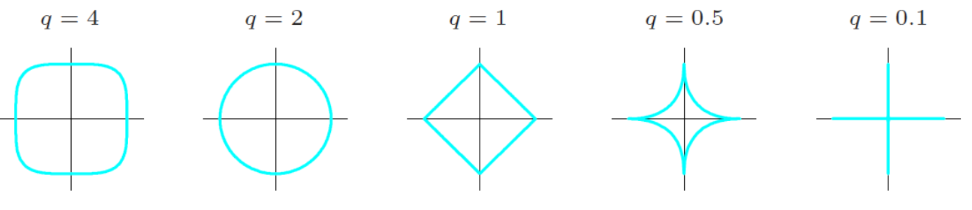

#### NB: What's the difference between AIC/BIC and cross validation?

- AIC/BIC focus on model selection by balancing goodness of fit and model complexity using different statistical criteria. They aim to find the most suitable model within a given set of candidate models.
<br>

- Cross-validation assesses the predictive performance of a model by estimating its ability to generalize to unseen data. It provides an evaluation of the model's overall performance and can help identify potential issues like overfitting.

While AIC/BIC and cross-validation are different approaches, they can be complementary. AIC/BIC can guide the selection of a model from a set of candidate models, and cross-validation can provide a more robust evaluation of the selected model's performance. It's important to consider the specific goals, assumptions, and limitations of each method when choosing an appropriate approach for model selection and evaluation.

### Non-linear regression
Now your model does not depend linearly on the parameters, let's see a few of them

#### GPR (Gaussian Process Regression) (approfondire)
A gaussian process is a non-parametric model that can be used to represent a distribution over functions. A non parametric model assumes that ***the data distribution cannot be defined in terms of a finite set of parameters.***

> Any function can be modeled by an infinite dimensional multivariate Gaussian Distribution

The idea is that you can sample points from a gaussian and join them up in order to get lines, if you do this for an infinite dimensional multivariate gaussian you get an infinite number of points. These points will not need to be joined since every point in between every point is filled with points. 

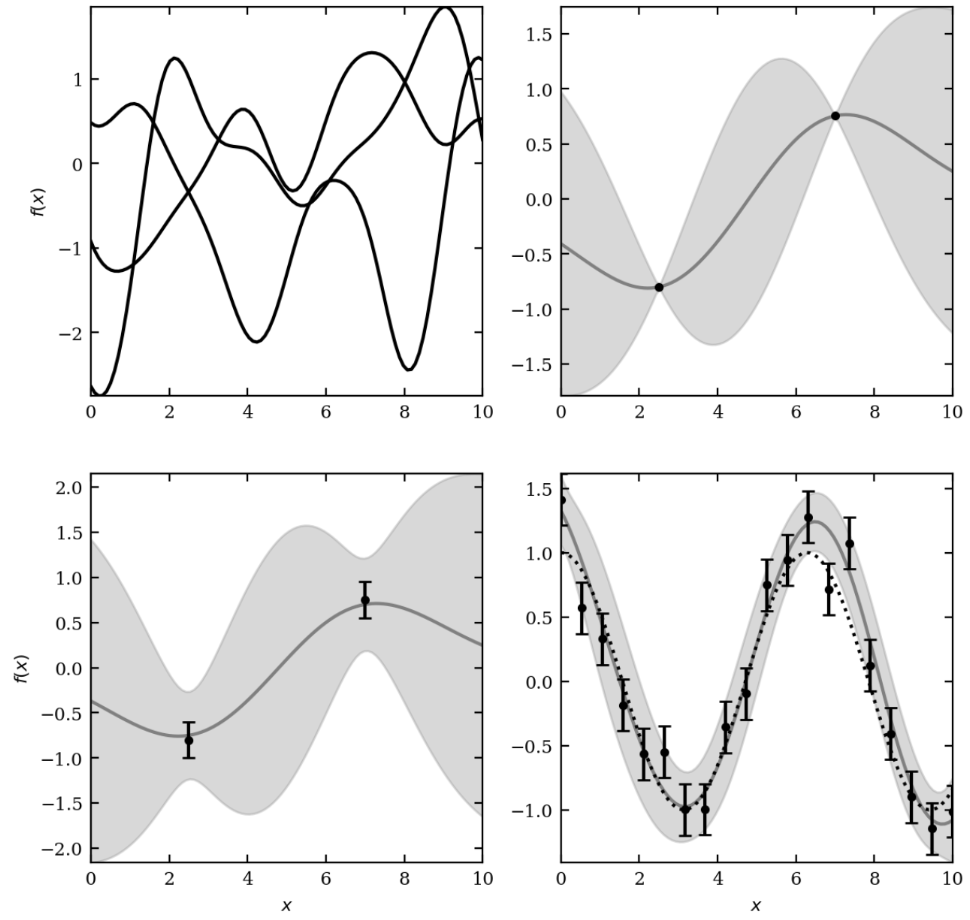

The way it works:
- You draw some random distributions from a Gaussian Basis. Here we will define a covariance term given by
    $${\rm Cov}(x_1, x_2; h) = \exp\left(\frac{-(x_1 - x_2)^2}{2 h^2}\right).$$
    where $h$ is a bandwidth.
    This results in infinitely many different functions. For a given bandwidth we can define an infinite set of such functions. 
<br>

- Then we constrain these functions by selecting those that pass through a given set of points. To fo this we calculate the posterior
$$p(f_j | \{x_i, y_i, \sigma_i\}, x_j^\ast).$$
<br>

- Finally, you **average** over all the functions that pass through our input data, 

- Given a new input point, GP regression provides predictions of the corresponding output value along with uncertainty estimates

- The predictive mean is obtained as a weighted combination of observed output values, with weights determined by the similarity (based on the covariance function) between the new input point and the observed input points

---

## Classification

#### ROC curve

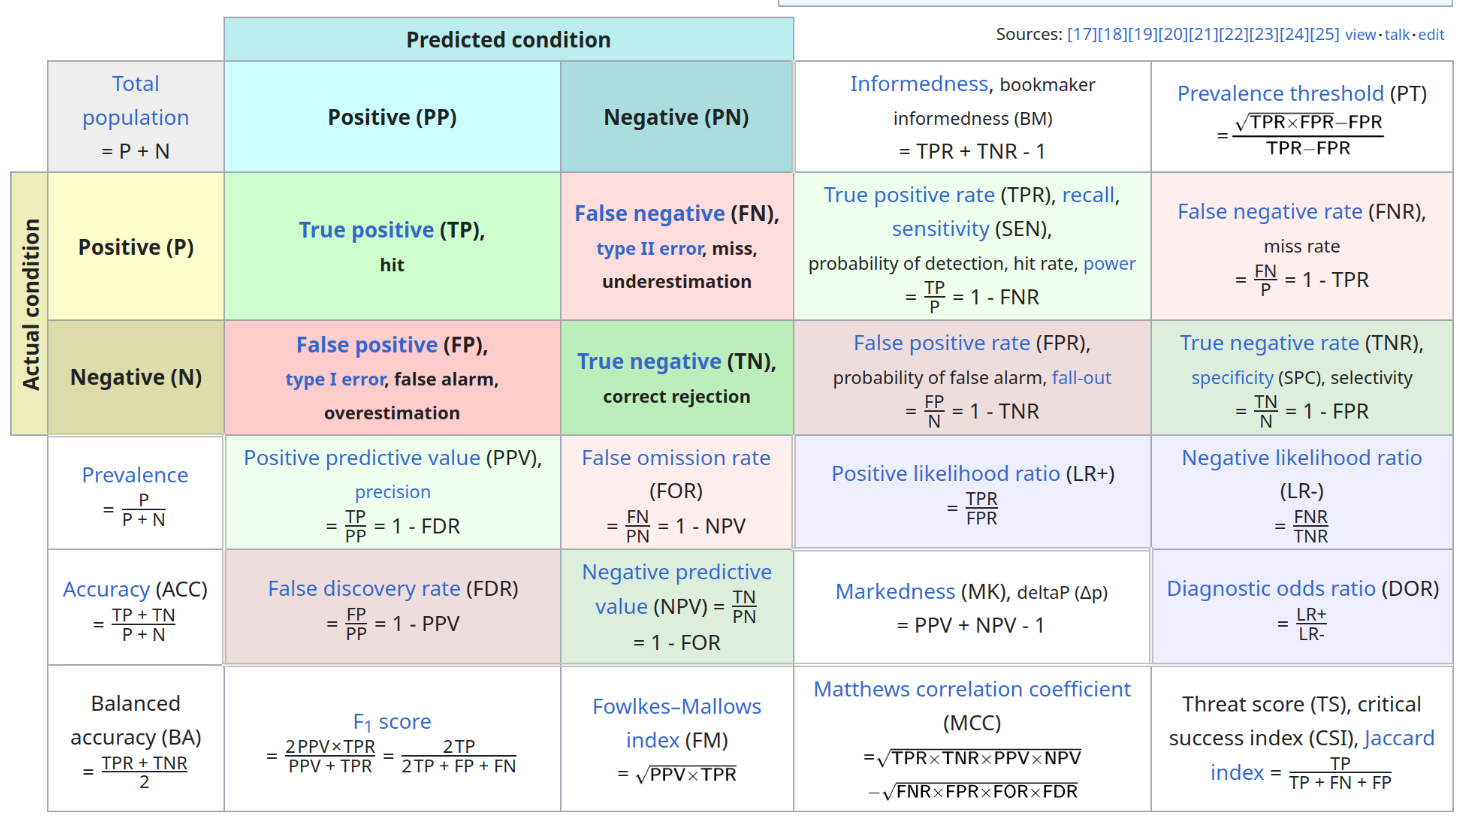

We can build a curve that simply plotes the **true positive rate vs false positive rate**.

the ROC curve shows a better model when you decrease the FPR and increase the TPR, the best classifier would be the one which has no FP at all.

The TPR is defined as TP/P that is the true positives over the real positives, while the FPR is the FP/N false positives over the real negatives, so how many times i was wrongly classifying my data.

The AUC (Area Under the Curve) is a robust estimator for a classifier, it's simply the integral of the ROC curve, the higher it is the better the model.



## Deep Learning

#### cost function
In deep learning, a cost function (also known as a loss function or objective function) is a mathematical function that measures the discrepancy between the predicted output of a neural network model and the true target output. It quantifies the error or loss incurred by the model's predictions and serves as a basis for updating the model's parameters during the training process.

#### gradient descent
instead of minimizing your loss by computing the minimum for the whole multi dimensional space of your parameters, which is extremely computationally costly, you can use **gradient descent**.
Basically you make a prediction and then calculate the loss, then for the next iteration you will ask your algorithm to go towards the lowest gradient direction until the gradient is zero. This way your parameter will reach a good value for your prediction.